### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import Sequential, layers

### Read IMDB Dataset

In [2]:
df = pd.read_csv('IMDB Dataset.csv')[0:10000]

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


### View descriptive stats

In [5]:
df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


### Check for imbalanced data

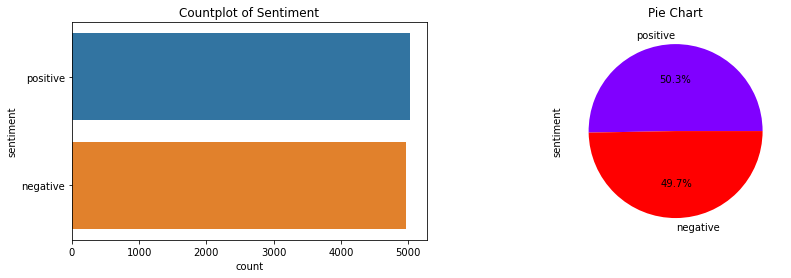

In [78]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.title('Countplot of Sentiment')
sns.countplot(y = df['sentiment'])


plt.subplot(1,2,2)
plt.title('Pie Chart')
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', cmap = 'rainbow')
plt.show()

### Create a function to Preprocess the review column

In [7]:
def preprocess(sentence):
    text = sentence.lower()
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(word,'v') for word in text]
    text = ' '.join(text)
    return text

In [8]:
df['review'] = df['review'].apply(preprocess)

### Print some text after applying the function

In [80]:
for i in range(5):
    print(df['review'][i])
    print()

One of the other reviewers have mention that after watch just 1 Oz episode you ll be hook They be right as this be exactly what happen with me br br The first thing that strike me about Oz be its brutality and unflinching scenes of violence which set in right from the word GO Trust me this be not a show for the faint hearted or timid This show pull no punch with regard to drug sex or violence Its be hardcore in the classic use of the word br br It be call OZ as that be the nickname give to the Oswald Maximum Security State Penitentary It focus mainly on Emerald City an experimental section of the prison where all the cells have glass front and face inwards so privacy be not high on the agenda Em City be home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffle death star dodgy deal and shady agreements be never far away br br I would say the main appeal of the show be due to the fact that it go where other show wouldn t dare Forget pretty picture paint 

### Split the dataset into Input (X) & Target (y) variable

In [10]:
X = df['review']

In [11]:
y = df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [12]:
y = y.map({'positive':0,'negative':1})

In [81]:
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: sentiment, Length: 10000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [ ]:
tokenizer = Tokenizer(num_words=5000)

In [15]:
tokenizer.fit_on_texts(X)

In [16]:
vocab_size = len(tokenizer.word_index) + 1

In [17]:
def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

In [18]:
X = text_encoding(X)

### Split the dataset into Training & Testing set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential Model with LSTM Layers

In [22]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation = 'sigmoid'))

### Compile the model

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Train the model with our training set

In [24]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
238/238 [==============================] - 67s 263ms/step - loss: 0.4925 - accuracy: 0.7501 - val_loss: 0.4119 - val_accuracy: 0.8225
Epoch 2/10
238/238 [==============================] - 60s 252ms/step - loss: 0.2757 - accuracy: 0.8933 - val_loss: 0.3582 - val_accuracy: 0.8400
Epoch 3/10
238/238 [==============================] - 63s 266ms/step - loss: 0.1840 - accuracy: 0.9320 - val_loss: 0.3747 - val_accuracy: 0.8475
Epoch 4/10
238/238 [==============================] - 91s 381ms/step - loss: 0.1265 - accuracy: 0.9542 - val_loss: 0.4517 - val_accuracy: 0.8275
Epoch 5/10
238/238 [==============================] - 81s 342ms/step - loss: 0.0896 - accuracy: 0.9682 - val_loss: 0.5955 - val_accuracy: 0.8375
Epoch 6/10
238/238 [==============================] - 87s 362ms/step - loss: 0.0662 - accuracy: 0.9770 - val_loss: 0.5455 - val_accuracy: 0.8450
Epoch 7/10
238/238 [==============================] - 70s 293ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.6724 - val_ac

### Make prediction with X_test

In [82]:
y_pred = model.predict(X_test)

63/63 [==============================] - 5s 82ms/step


array([[0.9989594 ],
       [0.99624383],
       [0.9998386 ],
       ...,
       [0.989008  ],
       [0.00273009],
       [0.8238328 ]], dtype=float32)

### Convert to 0 and 1 with higher probability towards 1

In [32]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

### Evaluate the model

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Check accuracy score

In [35]:
accuracy_score(y_test,y_pred)

0.819

### Check confusion matrix

<AxesSubplot:>

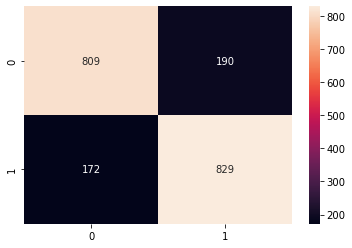

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print Classification report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       999
           1       0.81      0.83      0.82      1001

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



***